<a href="https://colab.research.google.com/github/Aaron-David-HdM/Applied-Data-Analytics/blob/main/Durchf%C3%BChrung%20der%20Clusternanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Aaron-David-HdM/Applied-Data-Analytics.git

Cloning into 'Applied-Data-Analytics'...
remote: Enumerating objects: 343, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 343 (delta 67), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (343/343), 170.89 KiB | 8.14 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [2]:
%cd /content/Applied-Data-Analytics/UseCase_2

/content/Applied-Data-Analytics/UseCase_2


In [97]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

filepath = 'Verkaufszahlen.csv' # Bereinigte Verkaufszahlen für Usecase 2
df = pd.read_csv(filepath, decimal='.')

In [98]:
# Berechnen des Ratingsdurchschnittes

average_of_ratings = round(df["Rating"].mean(), 1)
print(average_of_ratings)

7.0


In [99]:
# Testdurchlauf mit Rating < Ratingsdurchschnitt

df = df.loc[(df['Rating'] < average_of_ratings)]
df = df.drop('Unnamed: 0', 1)
df

,Gender,Total,Rating
4,Male,634.38,5.3
5,Male,627.62,4.1
6,Female,433.69,5.8
9,Female,172.75,5.9
10,Female,60.82,4.5
...,...,...,...
994,Female,64.00,5.9
995,Male,42.37,6.2
996,Female,1022.49,4.4
998,Male,69.11,4.1


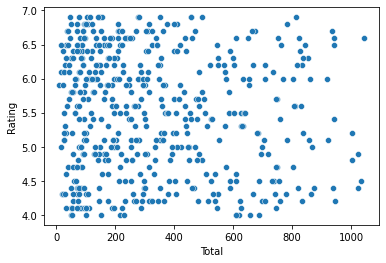

In [100]:
sns.scatterplot(x='Total', y='Rating', data=df);

In [101]:
# Standardization of features
X = df[['Total','Rating']] 

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

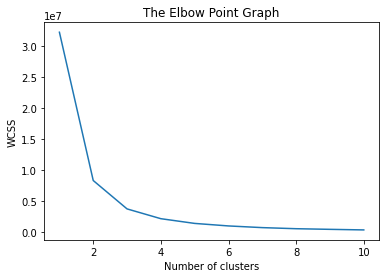

In [102]:
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   kmeans.fit(X)
   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
   wcss.append(kmeans.inertia_)  

#Plotting The Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

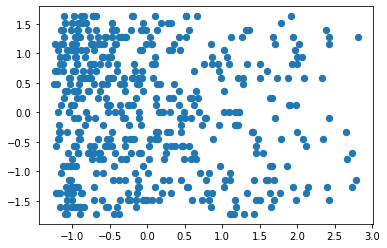

In [103]:
plt.scatter(X_std[:, 0], X_std[:, 1], s=40);

**k-Means**

In [104]:
kmeans = KMeans(n_clusters=3) #2
kmeans.fit(X_std)

KMeans(n_clusters=3)

In [105]:
y_kmeans = kmeans.predict(X_std)

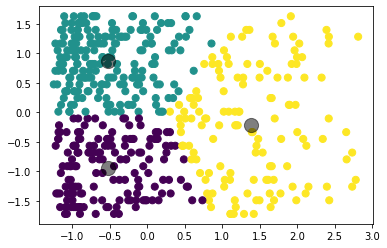

In [106]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [107]:
df['gender_kmeans'] = y_kmeans

**Hierarchical Clustering (Ward)**

In [108]:
ward = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3)#2
ward.fit(X_std)

AgglomerativeClustering(n_clusters=3)

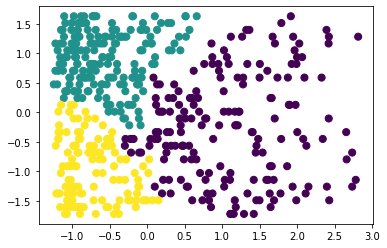

In [109]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=ward.labels_, s=50, cmap='viridis');

In [110]:
gender_ward = ward.fit_predict(X_std)

In [111]:
df['gender_ward'] = gender_ward 

**Compare results**

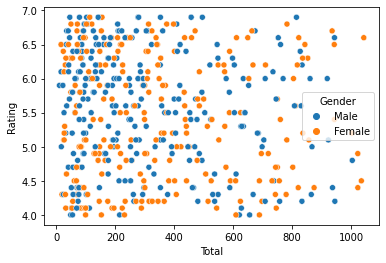

In [112]:
sns.scatterplot(x='Total', y='Rating', hue='Gender', data=df);

In [113]:
df['Gender'].value_counts()

Male      257
Female    242
Name: Gender, dtype: int64

**k-Means**

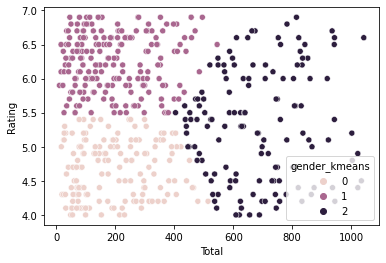

In [114]:
sns.scatterplot(x='Total', y='Rating', hue='gender_kmeans', data=df);

In [115]:
df['gender_kmeans'].value_counts()

1    205
0    158
2    136
Name: gender_kmeans, dtype: int64

**Ward**

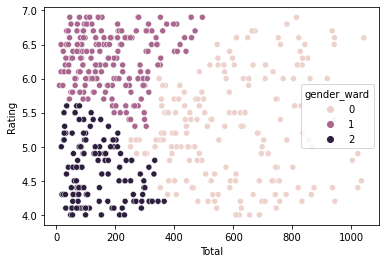

In [116]:
sns.scatterplot(x='Total', y='Rating', hue='gender_ward', data=df);

In [117]:
df['gender_ward'].value_counts()

1    189
0    183
2    127
Name: gender_ward, dtype: int64

Nun die einzelnen Cluster untersuchen. Average der einzelnen Cluster untersuchen wie in diesem [Video](https://www.youtube.com/watch?v=3Spa10-mwsw&ab_channel=KunaalNaik). 
Unteschied zwischen k-Means und Ward recherchieren!